# Avocado Project

# Importing library

In [1]:
import pandas as pd
import matplotlib
matplotlib.use("Agg")
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import ydata_profiling
%matplotlib inline

import plotly.offline as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
from pydantic_settings import BaseSettings
from plotly import tools
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", module="matplotlib")
warnings.filterwarnings("ignore",category=DeprecationWarning)

Read in the Avocado Prices csv file as a DataFrame called df

In [2]:
df= pd.read_csv("avocado.csv")

In [3]:
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


# Data Profiling

# Understanding the Avocado Dataset

Lets check our data shape:
 __Dataset__  has __18249 rows__ and __14 columns.__

In [4]:
df.shape

(18249, 14)

In [5]:
df.columns  # This will print the names of all columns.

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [6]:
df.head()  # Will give you first 5 records

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


- The Feature "Unnamed:0" is just a representation of the indexes, so it's useless to keep it, we'll remove it in pre-processing !

In [7]:
df.tail()  # This will print the last n rows of the Data Frame

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,11,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


In [8]:
df.info() # This will give Index, Datatype and Memory information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


- Well as a first observation we can see that we are lucky, we dont have any missing values (__18249__ complete data) and __13 columns__. Now let's do some Feature Engineering on the Date Feature in __pre-processing__ later so we can be able to use the day and the month columns in building our machine learning model later. ( I didn't mention the year because its already there in data frame)

In [9]:
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


We can see all columns having count __18249__. Looks like it doesn't contain missing values

In [10]:
df.isnull().sum()  # Will show you null count for each column, but will not count Zeros(0) as null

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

We can see that __no missing values__ exist in dataset, that's great!

# Profiling

In [11]:
profile = ydata_profiling.ProfileReport(df)
profile.to_file(output_file="avocado_before_preprocessing.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

 I have done Pandas Profiling before preprocessing dataset, so we can get initial observations from the dataset in better visual aspects, to find correlation matrix and sample data. File was saved as html file __avocado_before_preprocessing.html__.

 Will take a look at the file and see what useful insight you can develop from it. <br/>

 Initial observation as a result from profiling of __Avocado Dataset__ can be seen in  __avocado_before_preprocessing.html__

# Preprocessing

 The Feature __"Unnamed:0"__ is just a representation of the indexes, so it's useless to keep it, lets remove it now !

In [12]:
df.drop('Unnamed: 0',axis=1,inplace=True)

 Lets check our data head again to make sure that the Feature __Unnamed:0 is removed__

In [13]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


 Earlier in __info__ we have seen that __Date__ is __Object__ type not the date type. We have to change its type to date type.

In [14]:
df['Date']=pd.to_datetime(df['Date'])
df['Month']=df['Date'].apply(lambda x:x.month)
df['Day']=df['Date'].apply(lambda x:x.day)

 Lets check the head to see what we have done:

In [15]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29



# Data Visualisation and Questions answered

__**Organic vs Conventional**__ : The main difference between organic and conventional food products are the chemicals involved during production and processing. The interest in organic food products has been rising steadily over the recent years with new health super fruits emerging. Let's see if this is also the case with our dataset

 __Q.1 Which type of Avocados are more in demand (Conventional or Organic)?__

In [16]:
Type=df.groupby('type')['Total Volume'].agg('sum')

values=[Type['conventional'],Type['organic']]
labels=['conventional','organic']

trace=go.Pie(labels=labels,values=values)
py.iplot([trace])

 Just over __2% of our dataset is organic__. So looks like __Conventional is in more demand__. Now, let's look at the average price distribution

 __Q.2 In which range Average price lies, what is distribution look like?__

<Axes: xlabel='AveragePrice'>

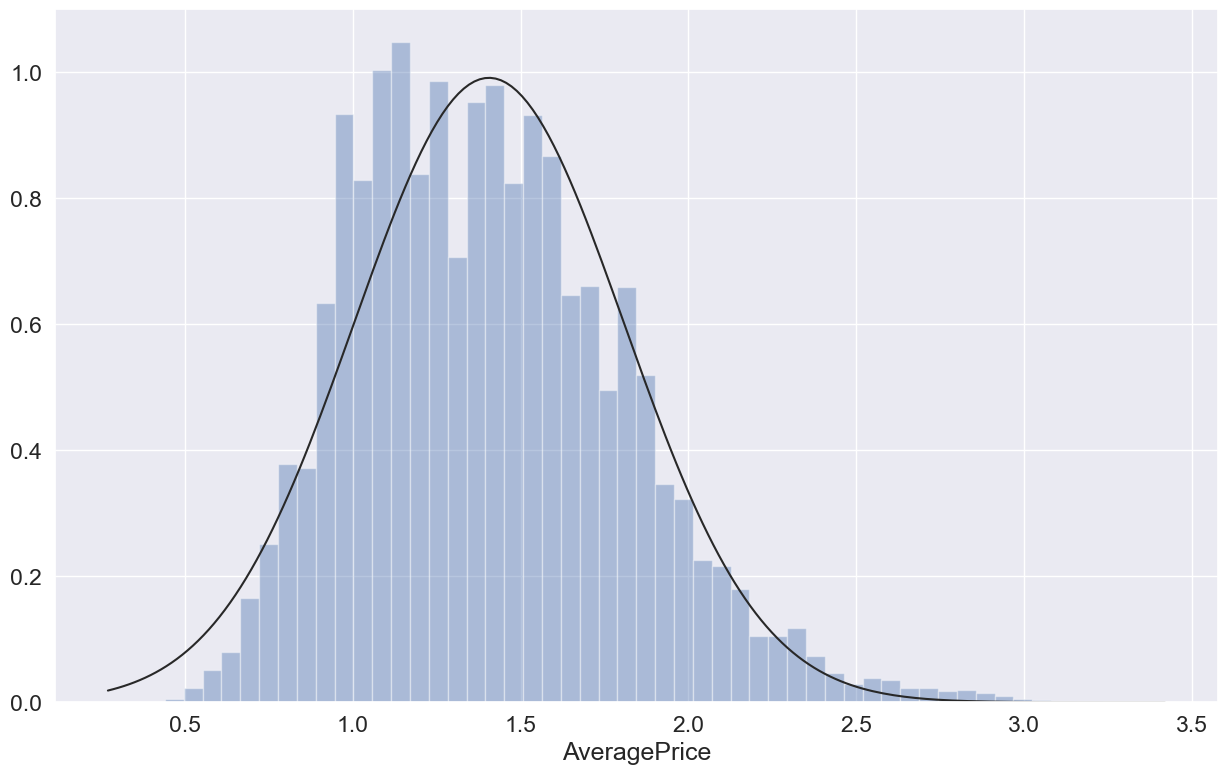

In [17]:
sns.set(font_scale=1.5) 
from scipy.stats import norm
fig, ax = plt.subplots(figsize=(15, 9))
sns.distplot(a=df.AveragePrice, kde=False, fit=norm)

 Average Price distribution shows that for most cases __price of avocado is between 1.1, 1.4.__

 Let's look at average price of conventional vs. organic. 

 __Q.3 How Average price is distributed over the months for Conventional and Organic Types?__

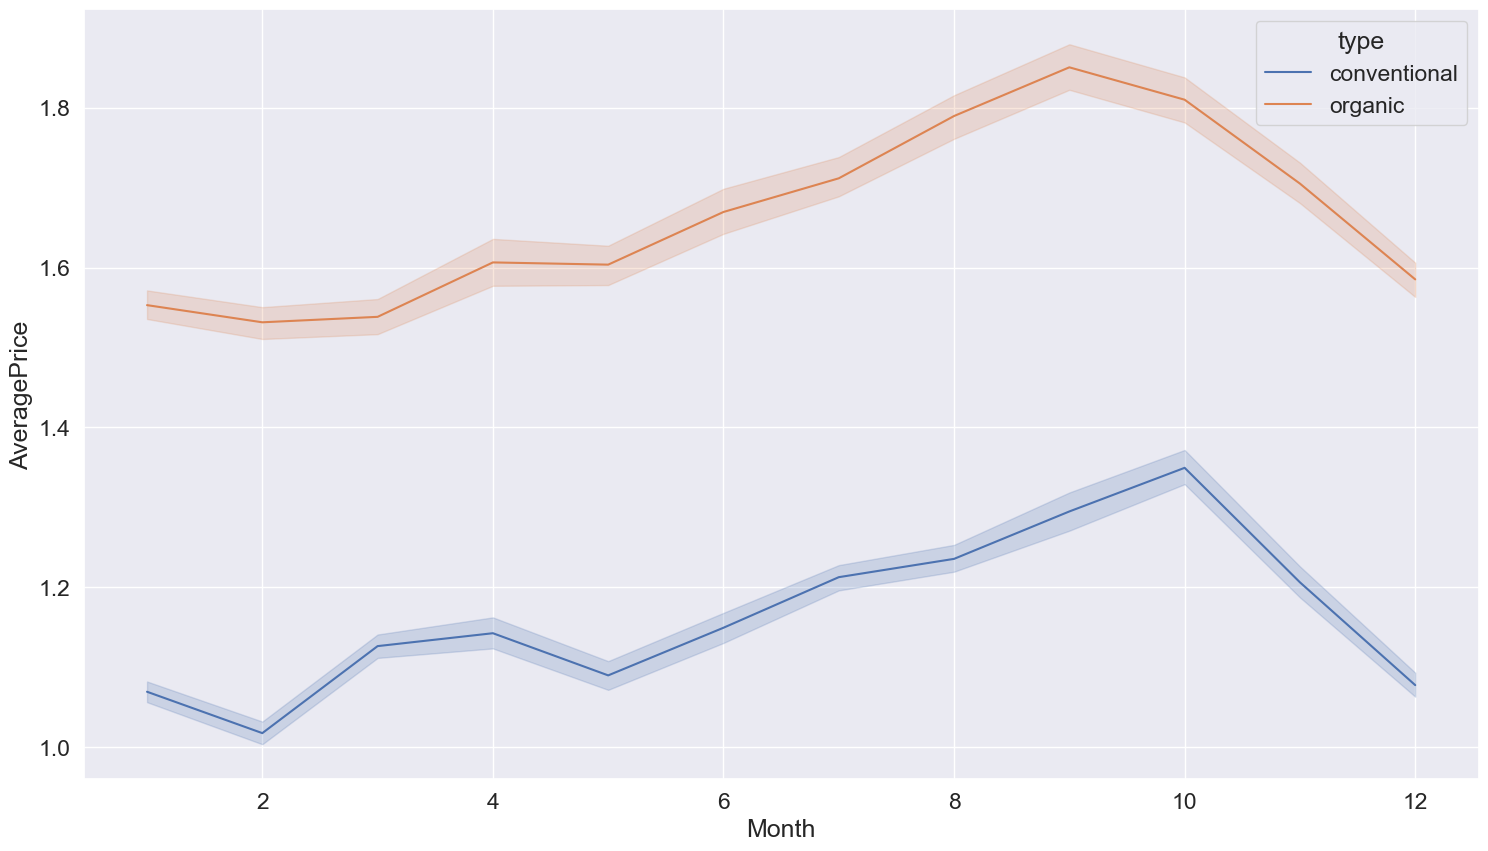

In [18]:
plt.figure(figsize=(18,10))
sns.lineplot(x="Month", y="AveragePrice", hue='type', data=df)
plt.show()

 Looks like there was a __hike between months 8 – 10 for both Conventional and Organic type__ of Avocados prices

# Now lets plot Average price distribution based on region 

 __Q.4 What are TOP 5 regions where Average price are very high?__

Text(0.5, 1.0, 'Average Price of Avocado According to Region')

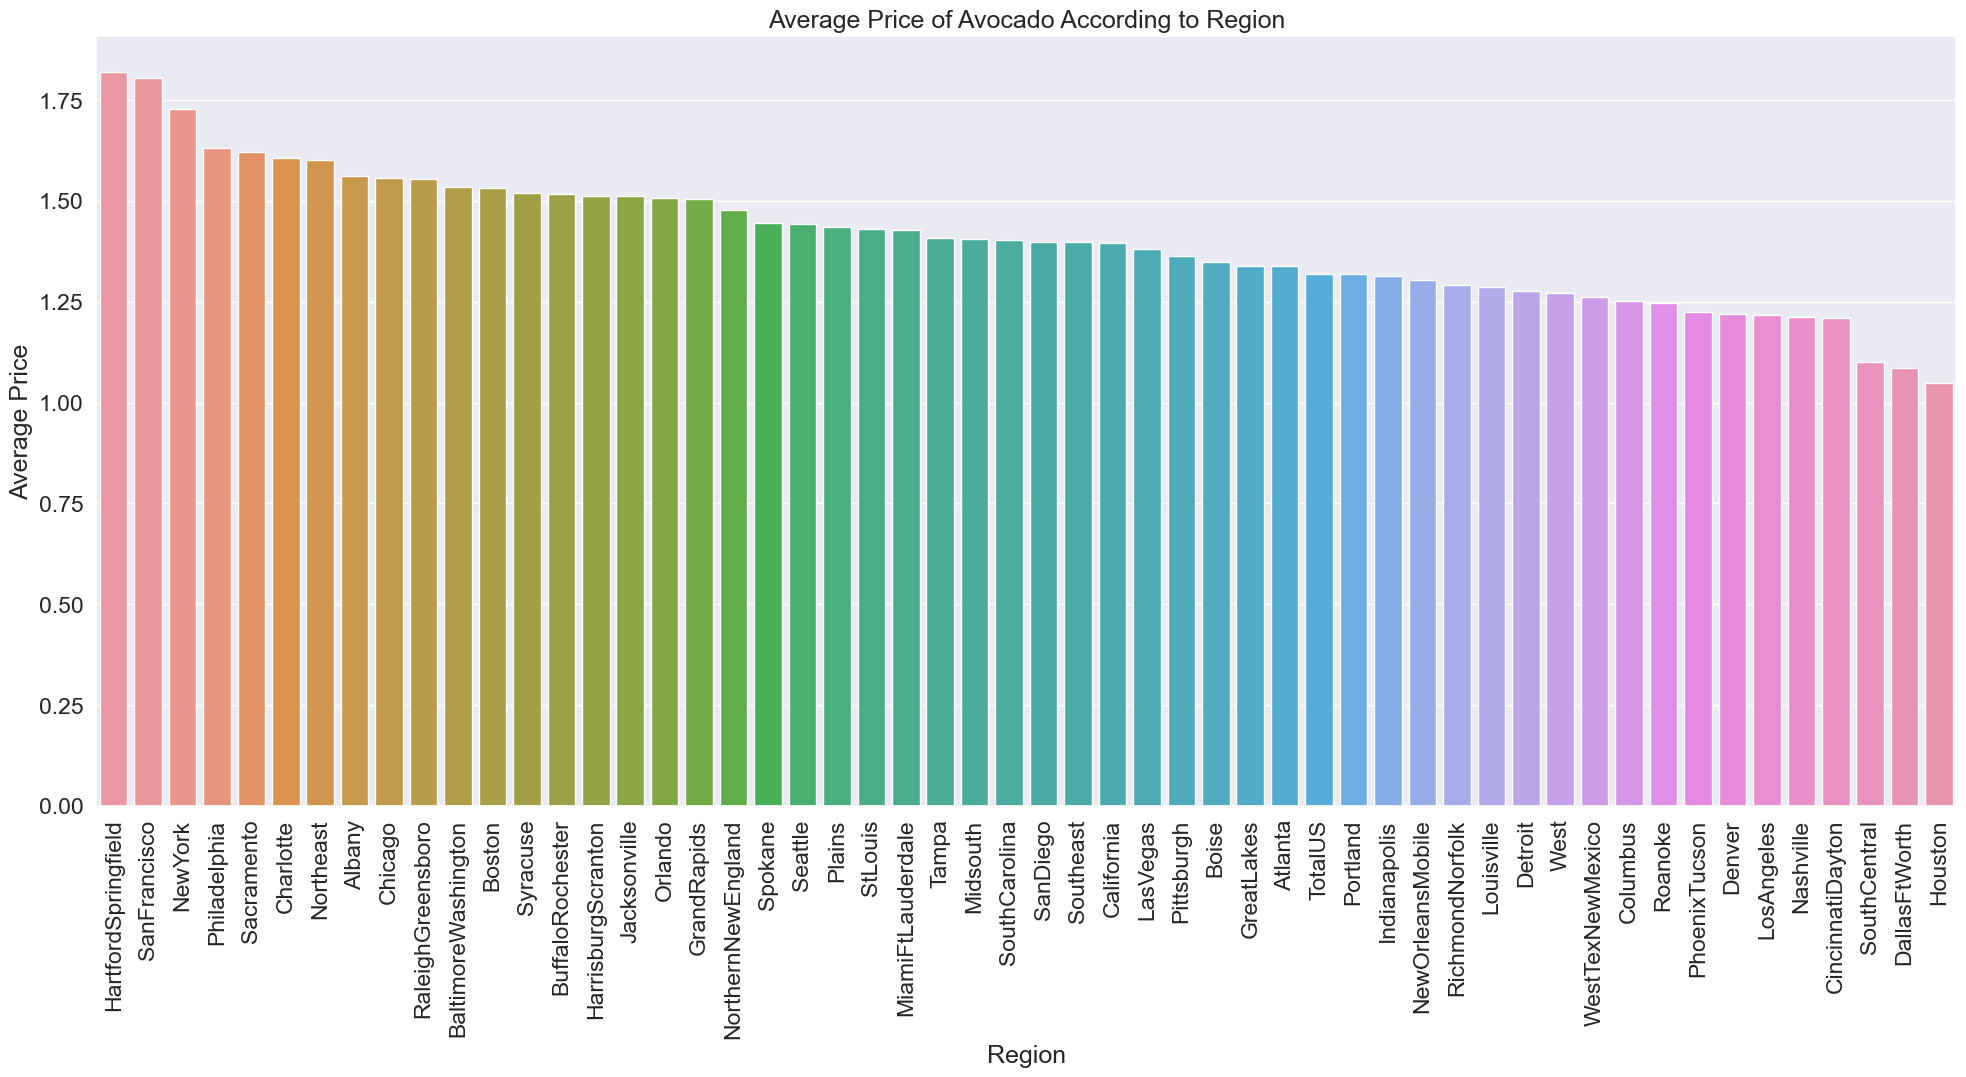

In [19]:
region_list=list(df.region.unique())
average_price=[]

for i in region_list:
    x=df[df.region==i]
    region_average=sum(x.AveragePrice)/len(x)
    average_price.append(region_average)

df1=pd.DataFrame({'region_list':region_list,'average_price':average_price})
new_index=df1.average_price.sort_values(ascending=False).index.values
sorted_data=df1.reindex(new_index)

plt.figure(figsize=(24,10))
ax=sns.barplot(x=sorted_data.region_list,y=sorted_data.average_price)

plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.title('Average Price of Avocado According to Region')

 <ul>Looks like these region are where price is very high
<ul><b><li>HartfordSpringfield</li>
<li>SanFrancisco</li>
<li>NewYork</li>
<li>Philadelphia</li>
    <li>Sacramento</li></b></ul></ul>

 __Q.5 What are TOP 5 regions where Average consumption is very high?__

Text(0.5, 1.0, 'Average of Total Volume According to Region')

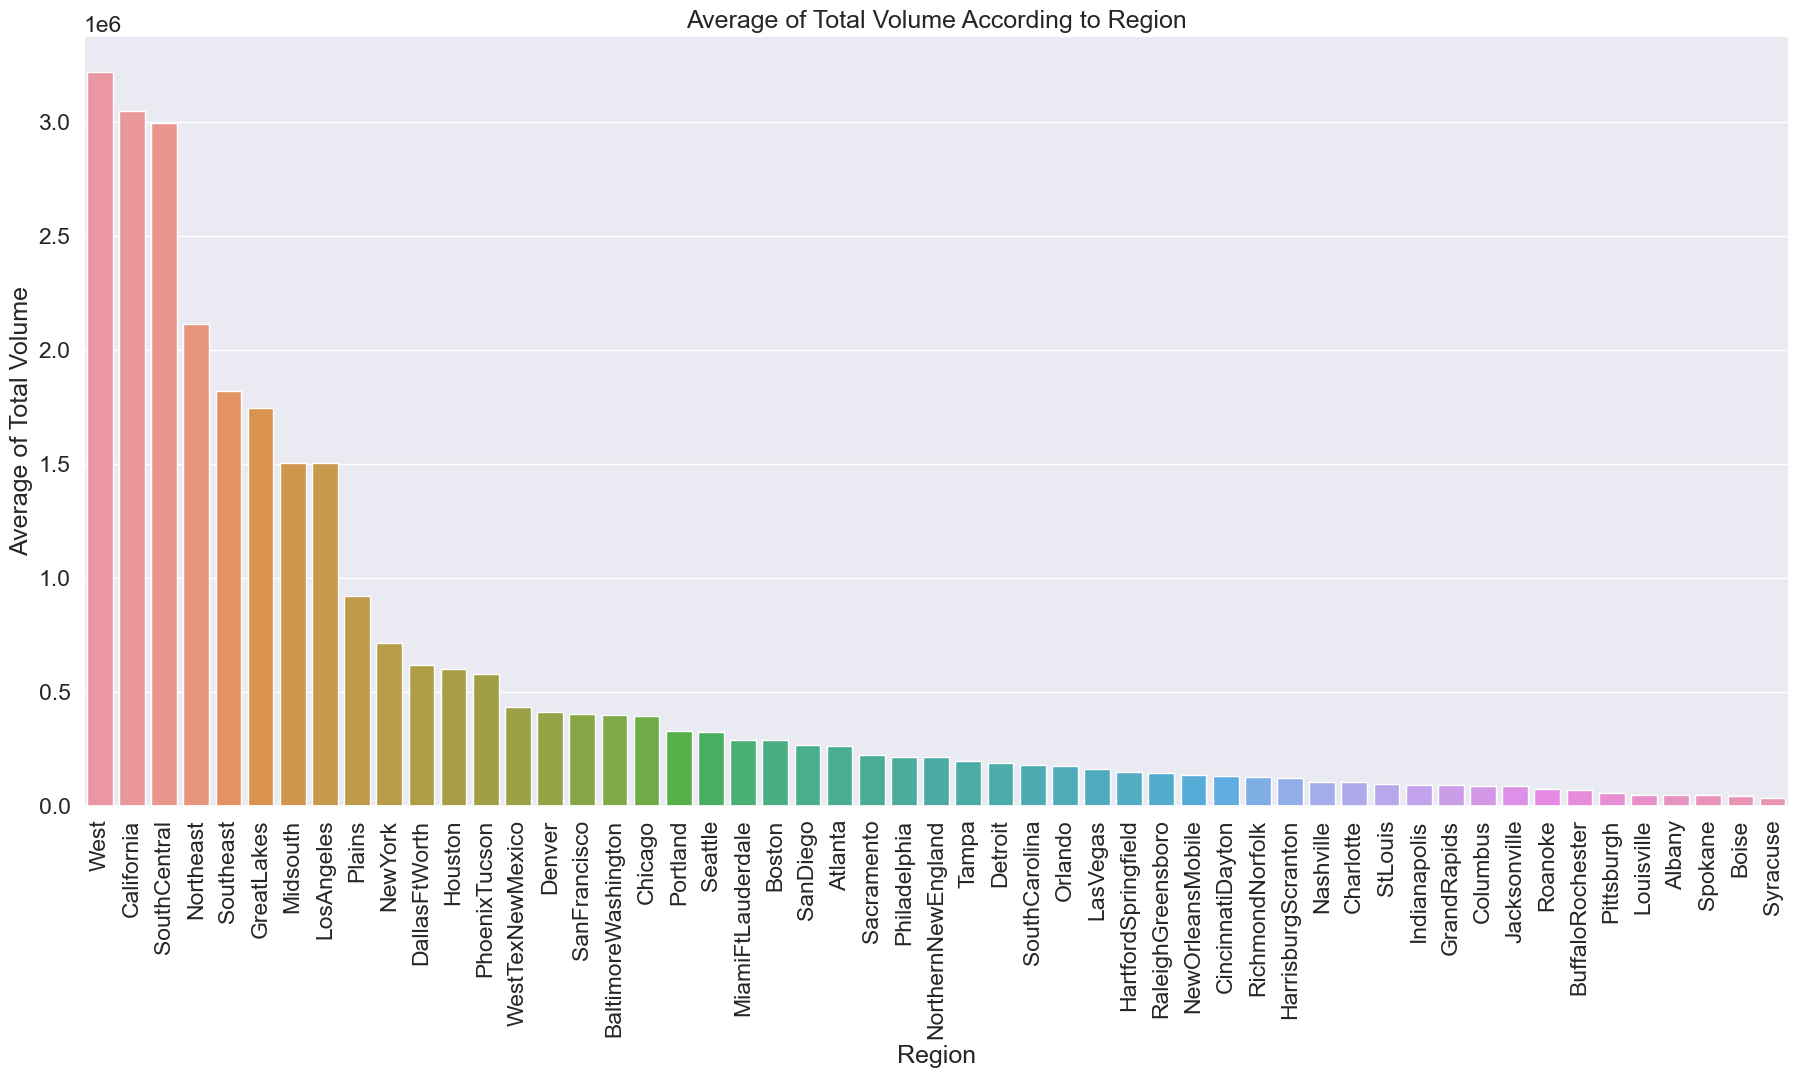

In [22]:
filter1=df.region!='TotalUS'
df1=df[filter1]

region_list=list(df1.region.unique())
average_total_volume=[]

for i in region_list:
    x=df1[df1.region==i]
    average_total_volume.append(sum(x['Total Volume'])/len(x))
df3=pd.DataFrame({'region_list':region_list,'average_total_volume':average_total_volume})

new_index=df3.average_total_volume.sort_values(ascending=False).index.values
sorted_data1=df3.reindex(new_index)

plt.figure(figsize=(22,10))
ax=sns.barplot(x=sorted_data1.region_list,y=sorted_data1.average_total_volume)

plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average of Total Volume')
plt.title('Average of Total Volume According to Region')

 <ul>Looks like these region are where Consumption is very high
<ul><b><li>West</li>
<li>California</li>
<li>SouthCentral</li>
<li>Northeast</li>
    <li>Southeast</li></b></ul></ul>

<a id=section13></a>

 __Q.6 In which year and for which region was the Average price the highest?__

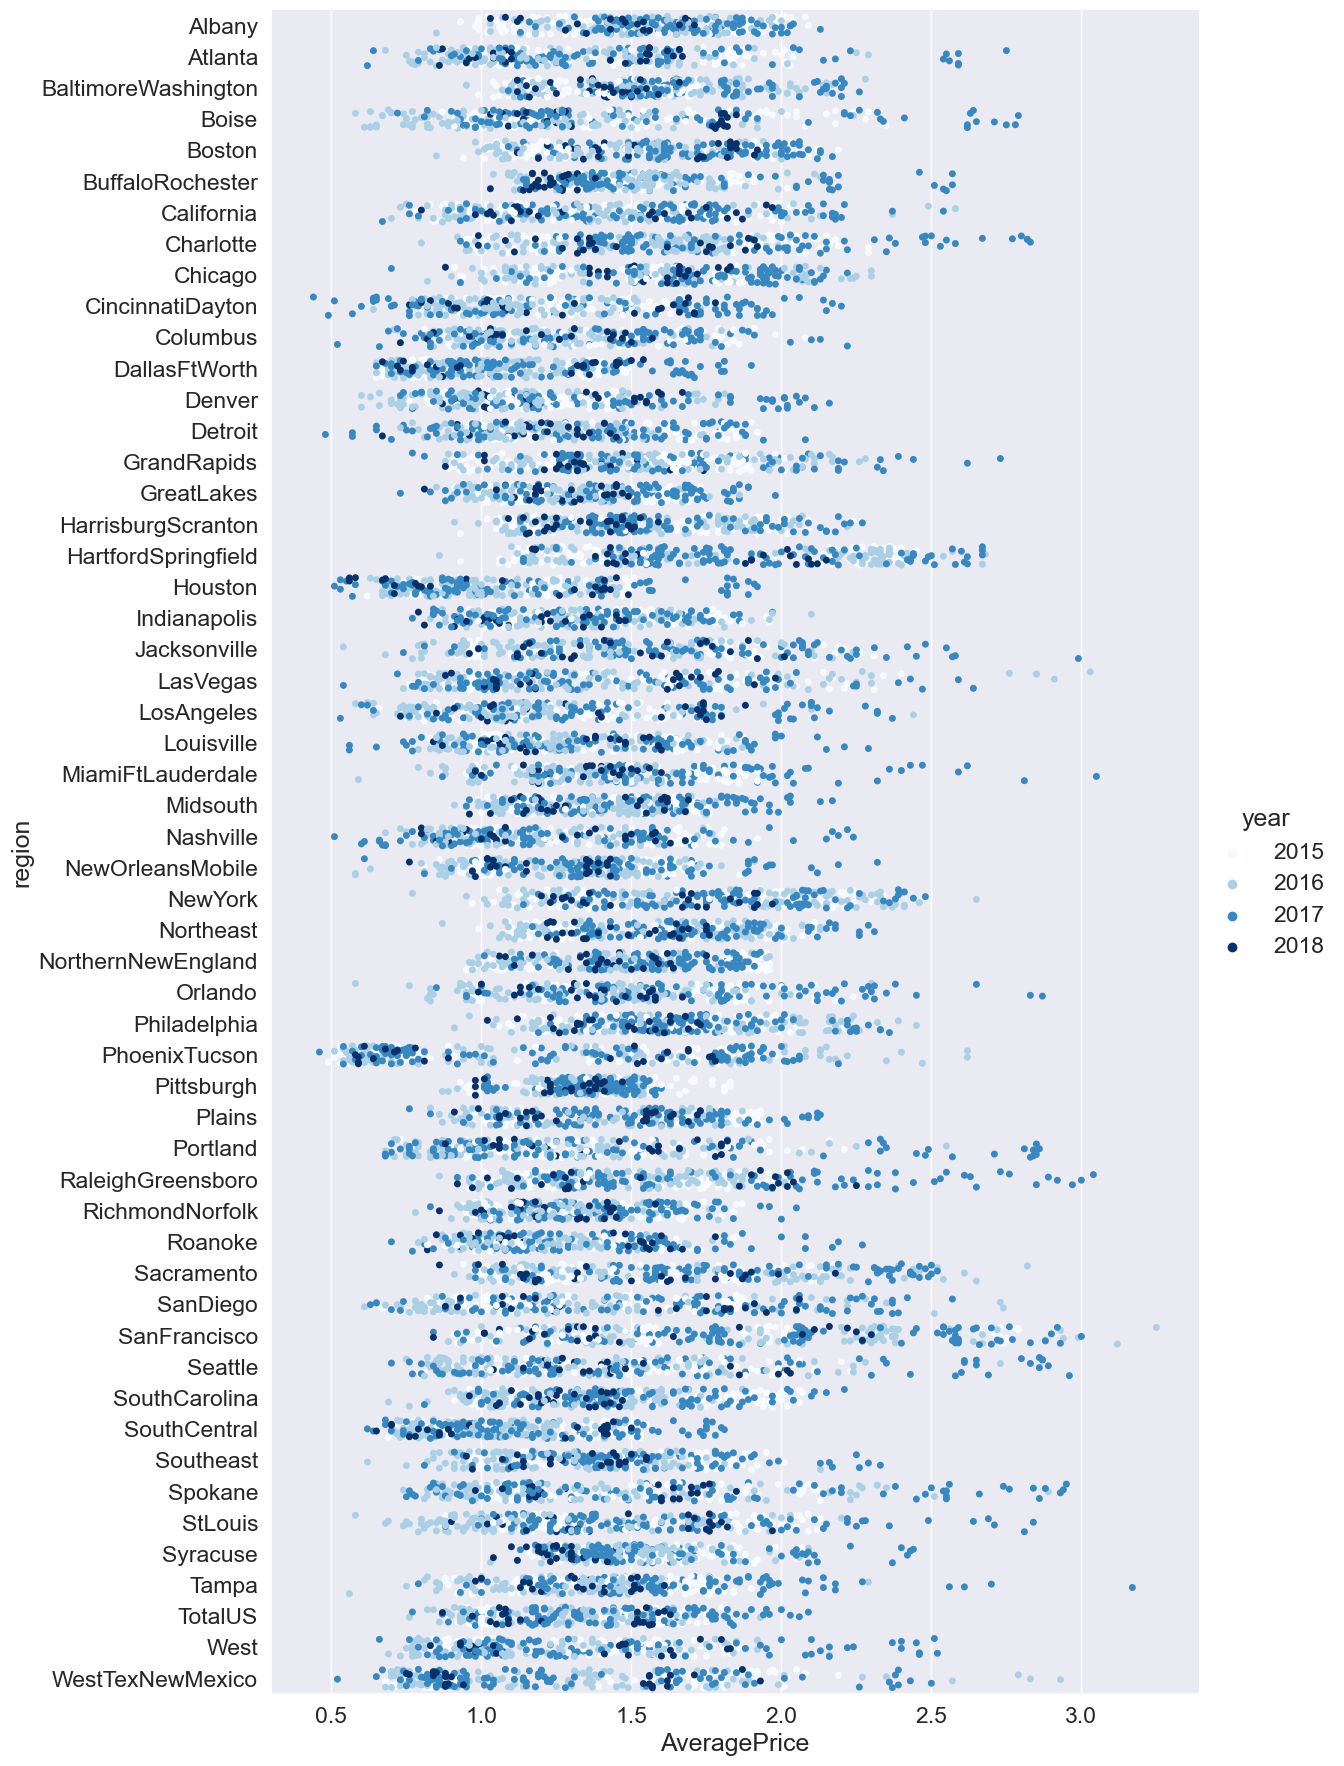

In [23]:
g = sns.catplot(x='AveragePrice', y='region', data=df,
                hue='year',
                height=18,
                aspect=0.7,
                palette='Blues',
                kind='strip',
                jitter=0.3  # Adjust the jitter level as needed
               )


 Looks like there was a __huge increase in Avocado prices as the demand was little high in Year 2017 in SanFranciso region. If you'll search it on google, you'll find the same.__

 __Q.7 How price is distributed over the date column?__

 Now lets do some plots!! I'll start by plotting the Avocado's Average Price  through the Date column

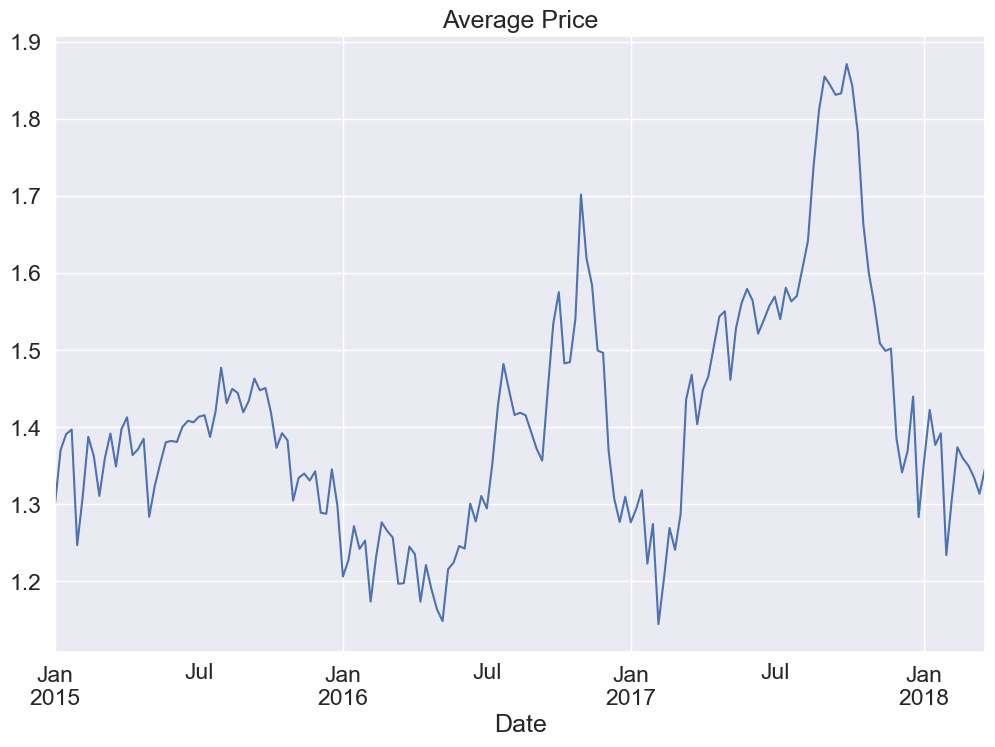

In [24]:
df['AveragePrice'] = df['AveragePrice'].fillna(df['AveragePrice'].mean())
df['AveragePrice'] = df['AveragePrice'].replace('[^0-9.]', np.nan, regex=True)
byDate = df.groupby('Date')['AveragePrice'].mean()
plt.figure(figsize=(12,8))
byDate.plot()
plt.title('Average Price')
plt.show()

 This also shows there was a huge hike in prices after __July 2017 and before Jan 2018__. This was also confirmed in earlier graph too.
 Cool right? now lets have an idea about the relationship between our Features(Correlation)

__Q.8 How dataset features are correlated with each other?__

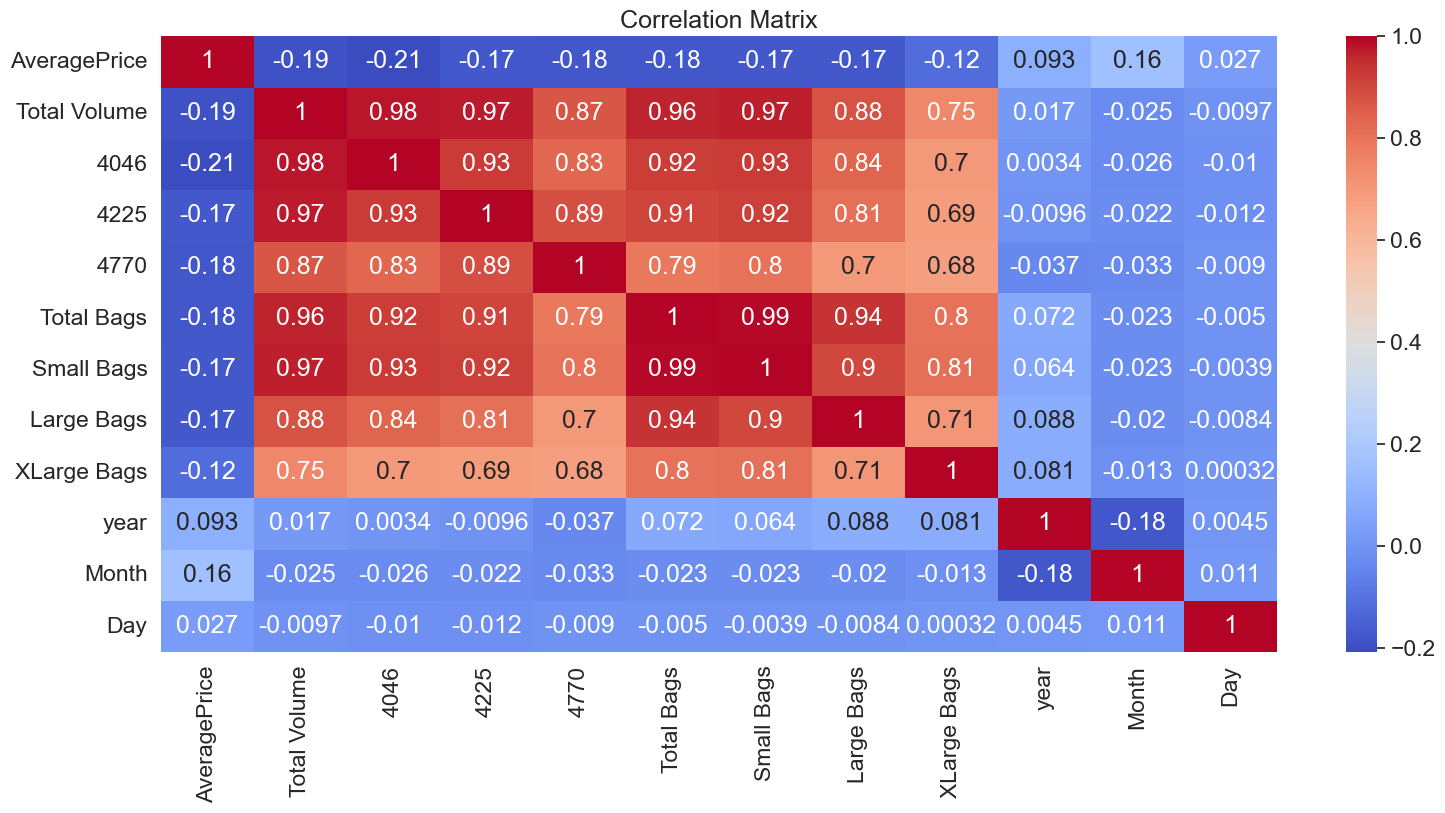

In [25]:
numeric_df = df.select_dtypes(include='number')
plt.figure(figsize=(18, 8))
sns.heatmap(numeric_df.corr(), cmap='coolwarm', annot=True)
plt.title('Correlation Matrix')
plt.show()


 As we can from the heatmap above, all the Features are not correleted with the __Average Price column__, instead most of them are correlated with each other. So now I am bit worried because that will not help us get a good model. Lets try and see.

 First we have to do some Feature Engineering on the __categorical Features : region and type__

# Feature Engineering for Model building

In [26]:
df['region'].nunique()

54

In [27]:
df['type'].nunique()

2

 As we can see we have __54 regions__ and __2 unique types__, so it's going to be easy to to transform the __type feature__ to dummies, but for the region its going to be a bit complex, so I decided to drop the entire column.

 I will drop the Date Feature as well because I already have __3 other columns for the Year, Month and Day__.

In [28]:
df_final=pd.get_dummies(df.drop(['region','Date'],axis=1),drop_first=True)

In [29]:
df_final.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day,type_organic
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,12,27,False
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,12,20,False
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,12,13,False
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,12,6,False
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,11,29,False


In [30]:
df_final.tail()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day,type_organic
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,2018,2,4,True
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,2018,1,28,True
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,2018,1,21,True
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,2018,1,14,True
18248,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,2018,1,7,True


# Model selection/predictions

 Now our data are ready! lets apply our model which is going to be the __Linear Regression because our Target variable 'AveragePrice' is continuous__.
 Let's now begin to train out regression model! We will need to first split up our data into an __X array that contains the features to train on__, and a __y array with the target variable__.

 __P.1 Are we good with Linear Regression? Lets find out.__

In [31]:
X=df_final.iloc[:,1:14]
y=df_final['AveragePrice']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

  Creating and Training the Model

In [32]:
lr=LinearRegression()
lr.fit(X_train,y_train)
pred=lr.predict(X_test)

In [33]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.2329713329163767
MSE: 0.09108802805333543
RMSE: 0.30180793238968295


 The __RMSE is low so we can say that we do have a good model, but lets check to be more sure__.
 Lets plot the __y_test vs the predictions__

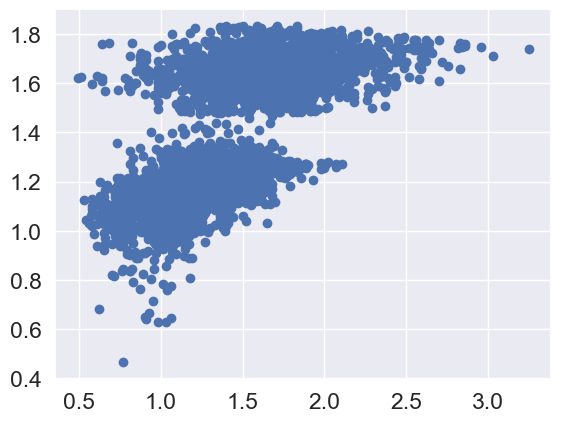

In [34]:
plt.scatter(x=y_test,y=pred)

- As we can see that __we don't have a straight line so I am not sure that this is the best model we can apply on our data__

- Lets try working with the  __Decision Tree Regression model__

- __P.2 Are we good with Decision Tree Regression? Lets find out.__

In [35]:
dtr=DecisionTreeRegressor()
dtr.fit(X_train,y_train)
pred=dtr.predict(X_test)

Text(0, 0.5, 'Predicted Y')

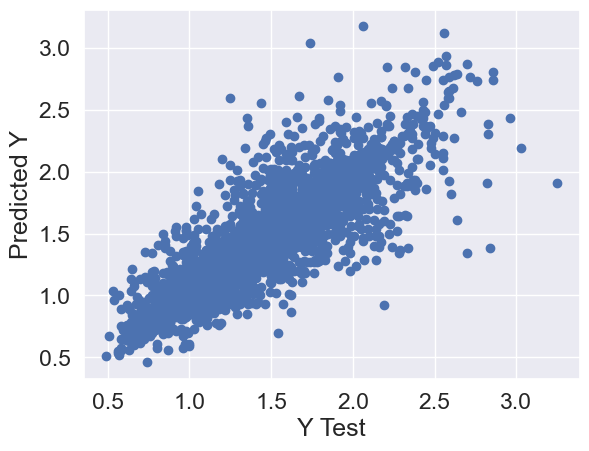

In [36]:
plt.scatter(x=y_test,y=pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

- Nice, here we can see that __we nearly have a straight line__, in other words __its better than the Linear regression model, and to be more sure lets check the RMSE__

In [37]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.13572876712328766
MSE: 0.044362931506849314
RMSE: 0.21062509704887808


- Very Nice, our __RMSE is lower than the previous one we got with Linear Regression__. Now I am going to try one last model to see if I can __improve my predictions for this data which is the RandomForestRegressor__

- __P.3 Are we good with Random Forest Regressor? Lets find out.__

In [38]:
rdr = RandomForestRegressor()
rdr.fit(X_train,y_train)
pred=rdr.predict(X_test)

In [39]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.10060243835616438
MSE: 0.02134988895616438
RMSE: 0.14611601197734758


- Well as we can see the __RMSE is lower than the two previous models__, so the __RandomForest Regressor is the best model in this case.__

<Axes: xlabel='AveragePrice', ylabel='Density'>

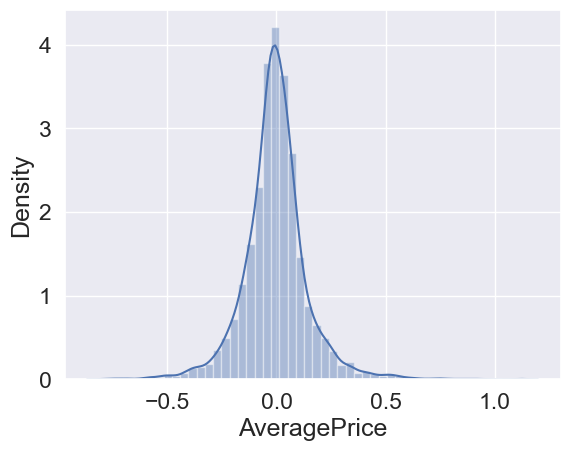

In [40]:
sns.distplot((y_test-pred),bins=50)

- Notice here that our __residuals looked to be normally distributed__ and that's really a __good sign which means that our model was a correct choice for the data.__ 

- __Lets see final Actual Vs Predicted sample.__

,Y Test,Pred
8604,0.82,0.9630
2608,0.97,0.9942
14581,1.44,1.4053
4254,0.97,0.9032
16588,1.45,1.4441


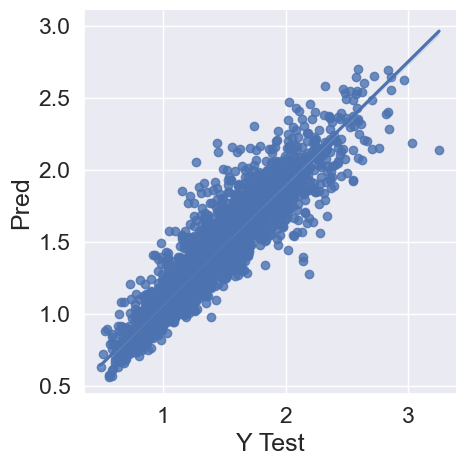

In [41]:
data = pd.DataFrame({'Y Test':y_test , 'Pred':pred},columns=['Y Test','Pred'])
sns.lmplot(x='Y Test',y='Pred',data=data,palette='rainbow')
data.head()

## * Conclusions

- With the help of notebook I learnt how __EDA__ can be carried out using __Pandas and other plotting libraries__.
- Also I have seen making use of packages like __matplotlib, plotly and seaborn__ to develop better insights about the data.<br/>
- I have also seen how __preproceesing__ helps in dealing with __missing values and irregualities__ present in the data. I also learnt __how to create new features__ which will in turn help us to better predict the survival. 
- I also make use of __pandas profiling__ feature to generate an html report containing all the information of the various features present in the dataset.
- I have seen the impact of columns like __type, year/date__ on the __Average price increase/decrease rate__.
- The most important inference drawn from all this analysis is, I get to know what are the __features on which price is highly positively and negatively coorelated with.__ 
- I came to know through analysis which model will be work with better accuracy with the help of __low residual and RMSE scores__.
- This project helped me to gain insights and how I should go with flow, which model to choose first and go step by step to attain results with good accuracy. Also get to know __where to use Linear, Decision Tree and other applicable and required models to fine tune the predictions__.